In [1]:
# Calculate vertical transport of potential temperature w*pt
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [2]:
# Find the uppler and lower layer depth above the sill crest
def Layer(u):
    # Layer interface, zero velocity crossing point
    h1 = np.empty(len(Xp1))
    z_th = np.empty(len(Xp1))
    itf = np.empty(len(Xp1))
    h1[[0,1,-2,-1]] = np.nan
    z_th[[0,1,-2,-1]] = np.nan
    itf[[0,1,-2,-1]] = np.nan
    for i in range(2,len(Xp1)-2):
        l = np.where(u[:, i] < 0)[-1][0]
        itf[i] = l
        z_th[i] = -w[l, i] * (pt[l, i]-T0)
        # Calculate layer depth
        h1[i] = depth[l]
    return (itf, z_th, h1)

# Find the uppler and lower layer depth above the sill crest
def Layer(u):
    # Layer interface, zero velocity crossing point
    #l = np.empty(len(X)-2)
    h1 = np.empty(len(X))
    z_th = np.empty(len(X))
    h1[0] = h1[-1] = np.nan
    z_th[0] = z_th[-1] = np.nan
    #end = len(X)-1
    Cp = 4220  # Specific heat content J/kg/C
    rho = 1025 # Density
    for i in range(1,len(X)-1):

        l = np.where(u[:, i] < 0)[-1][0] - 1
        z_th[i] = w[l, i] * pt[l, i] *  200 * 200 
        # Calculate layer depth
        if l <= 9:
            h1[i] = -depth[l]+0.25
        elif l <= 19:
            h1[i] = -depth[l]+0.5
        elif l <= 29:
            h1[i] = -depth[l]+0.75
        elif l <= 39:
            h1[i] = -depth[l]+2
        elif l <= 49:
            h1[i] = -depth[l]+4
    return (z_th, h1)

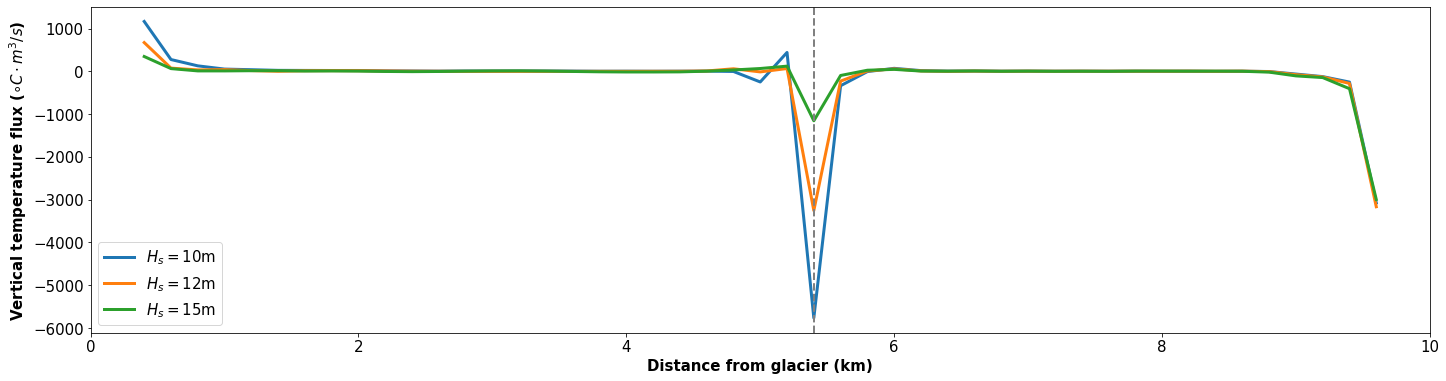

In [4]:
files = sorted(glob.glob('/Users/weiyangbao/Documents/Model_outputs/state700/Hs*.nc'))
Hs = np.array([10, 12, 15])
T0 = 9
fig, ax = plt.subplots(figsize=(24,6)) 
for i in range(len(files)):
    state0 = xr.open_dataset(files[i])
#file = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/state700/Hs_010')
    t0 = 60 # Start from day 30
    tn = len(state0.T) # End day
    state = state0.isel(Y = range(1,10), T = range(t0,tn)) # Remove the boundary walls in y direction
    pt = state.Temp.data.mean(axis=(0,2))
    w = state.W.data.mean(axis=(0,2))
    X = state.X.data
    Xp1 = state.Xp1.data
    x_dist = Xp1 / 1000
    depth = state.Zl.data
    u = state.U.data.mean(axis=(0,2))
    #u0 = state.U.data # dims = T, Z, Y, Xp1
    #u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
    #u = u_ymean.mean(0) # dims = Z, X
    #u[u==0] = np.nan
    itf, z_th, h1 = Layer(u)
    #val = np.empty(len(Hs))
    #val[i] = z_th[26]
    plt.plot(x_dist,z_th*9*40000, lw=3, label='$H_s=$' + str(Hs[i]) +'m')
    plt.legend(loc = 'best', fontsize = 15)
    
ax.axvline(x_dist[27],color='gray', linestyle='--',lw=2)
ax.set_xlim([0, 10])
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
#plt.title('hhh', size = 20, weight = 'bold')
ax.set_xlabel('Distance from glacier (km)', size = 15, weight = 'bold')
#ax.set_ylabel(r'Vertical volume flux ($m^3/s$)', size = 15, weight = 'bold')
ax.set_ylabel('Vertical temperature flux ($\circ C\cdot m^3/s$)', size = 15, weight = 'bold')

fig_path = "/Users/weiyangbao/Documents/Model_outputs/Theta/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig.savefig(fig_path + '/TH_interface.png', dpi = 150, bbox_inches='tight')

In [25]:
np.shape(u),u[:,-1]

((50, 50),
 array([0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963,
        0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963,
        0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963,
        0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963,
        0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963,
        0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963,
        0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963,
        0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963, 0.0012963,
        0.0012963, 0.0012963], dtype=float32))